# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import  warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
# from google.colab import files
# files.upload()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_path = '/content/drive/MyDrive/data/creditcardfraudTrain.csv'
df = pd.read_csv(dataset_path)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Exploring Dataset

In [6]:
df.shape

(1296675, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Checking missing values and duplicate records

In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Handling Date and Time columns

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

#Calculate Customer Age
df["cc_age"] = df["trans_date"]-df["dob"]
df["cc_age"] = df["cc_age"].astype('timedelta64[ns]')

In [11]:
df[['trans_date','dob','cc_age'] ]

,trans_date,dob,cc_age
0,2019-01-01,1988-03-09,11255 days
1,2019-01-01,1978-06-21,14804 days
2,2019-01-01,1962-01-19,20801 days
3,2019-01-01,1967-01-12,18982 days
4,2019-01-01,1986-03-28,11967 days
...,...,...,...
1296670,2020-06-21,1961-11-24,21394 days
1296671,2020-06-21,1979-12-11,14803 days
1296672,2020-06-21,1967-08-30,19289 days
1296673,2020-06-21,1980-08-18,14552 days


In [12]:
# converting customer age from days to year
df["cc_age_yrs"] = (df["trans_date"]-df["dob"]).dt.days // 365
df[['cc_age_yrs']]

,cc_age_yrs
0,30
1,40
2,56
3,52
4,32
...,...
1296670,58
1296671,40
1296672,52
1296673,39


# Cleaning unnecessary Columns

In [13]:
cols_to_drop = ['trans_date_trans_time','cc_age', 'Unnamed: 0',
                'dob','first','last','street','merch_lat','merch_long',
                'lat','long']
df.drop(cols_to_drop, axis=1, inplace=True)

In [14]:
df.head()

,cc_num,merchant,category,amt,gender,city,state,zip,city_pop,job,trans_num,unix_time,is_fraud,trans_date,cc_age_yrs
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,30
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,40
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,56
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,52
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,32


In [15]:
col_info=pd.DataFrame()
col_info['columns']= df.dtypes.index.tolist()
col_info['dtypes'] = df.dtypes.values.tolist()
col_info

,columns,dtypes
0,cc_num,int64
1,merchant,object
2,category,object
3,amt,float64
4,gender,object
5,city,object
6,state,object
7,zip,int64
8,city_pop,int64
9,job,object


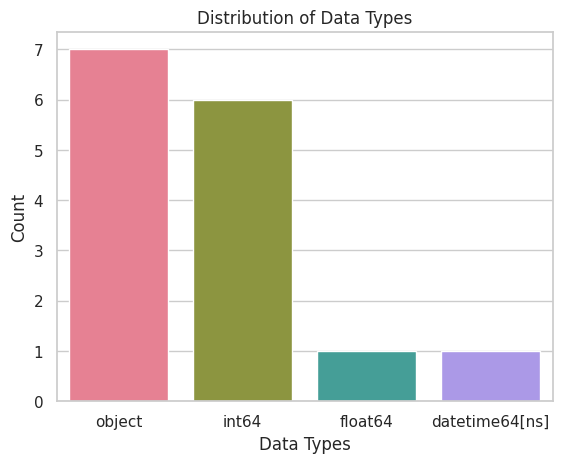

In [16]:
#col_info['dtypes'].value_counts().plot(kind='pie')
sns.barplot(x=col_info['dtypes'].value_counts().index, y=col_info['dtypes'].value_counts(), palette='husl')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.title('Distribution of Data Types')
plt.show()

In [17]:
num_col = col_info[(col_info['dtypes'] =='float64')]['columns'].values.tolist()
num_col

['amt']

In [18]:
date_time_col = col_info[(col_info['dtypes'] =='datetime64[ns]')]['columns'].values.tolist()
date_time_col

['trans_date']

In [19]:
obj_col = col_info[col_info['dtypes'] =='object']['columns'].values.tolist()
obj_col

['merchant', 'category', 'gender', 'city', 'state', 'job', 'trans_num']

In [20]:
non_numeric_col = col_info[col_info['dtypes'] =='int64']['columns'].values.tolist()
non_numeric_col

['cc_num', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'cc_age_yrs']

In [21]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'city_pop', 'job', 'trans_num', 'unix_time', 'is_fraud',
       'trans_date', 'cc_age_yrs'],
      dtype='object')

In [22]:
obj_int_col = obj_col.extend(non_numeric_col)
obj_int_col

In [23]:
cat_cols =[]
for col in df.columns:
    if col not in date_time_col and df[col].nunique() <=100:
        print(col, df[col].unique())
        cat_cols.append(col)

category ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
gender ['F' 'M']
state ['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']
is_fraud [0 1]
cc_age_yrs [30 40 56 52 32 57 25 71 77 44 28 29 73 51 53 66 80 72 38 47 54 41 48 34
 20 31 46 59 65 24 76 42 37 92 82 21 63 35 18 61 64 83 43 23 91 90 68 60
 67 33 17 89 58 55 70 50 45 19 15 49 87 78 84 26 36 79 14 13 81 62 39 85
 22 74 27 69 75 88 86 94 93 16 95]


In [24]:
bin_edges = [20, 40, 60, 90]
bin_labels = ['young', 'mid_age', 'old']

# Bin the 'cc_age_yrs' column
df['age_group'] = pd.cut(df['cc_age_yrs'], bins=bin_edges, labels=bin_labels)

In [25]:
df['age_group'].unique()

['young', 'mid_age', 'old', NaN]
Categories (3, object): ['young' < 'mid_age' < 'old']

In [26]:
cat_cols =[]
for col in df.columns:
    if col not in date_time_col and df[col].nunique() <=51:
        print(col, df[col].unique())
        cat_cols.append(col)

category ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
gender ['F' 'M']
state ['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']
is_fraud [0 1]
age_group ['young', 'mid_age', 'old', NaN]
Categories (3, object): ['young' < 'mid_age' < 'old']


                     Total no. of Unique Values
gender        2
is_fraud      2
age_group     3
category     14
state        51
dtype: int64


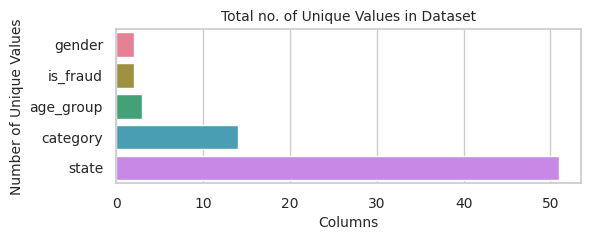

In [27]:
def check_unquie_count(df):
    unique_counts = df.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)
# Create a bar plot or count plot of unique values

    plt.figure(figsize=(6, 2))
    sns.barplot(y=unique_counts.index, x=unique_counts.sort_values(),palette='husl' )

    plt.xticks(rotation=0, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df[cat_cols])

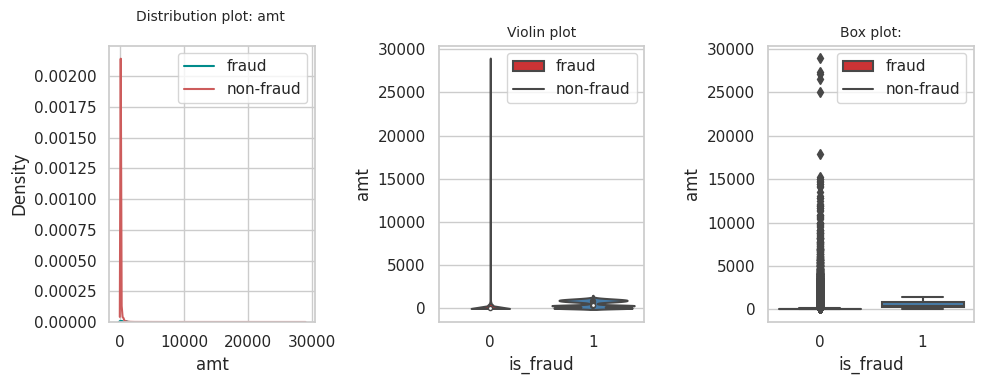

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

col_to_plot = 'amt'

sns.kdeplot(data = df, x = col_to_plot, ax=ax[0], hue='is_fraud',  palette=['indianred','darkcyan'], )
ax[0].set_title(f'Distribution plot: {col_to_plot} \n', fontsize=10)
ax[0].legend( labels=['fraud', 'non-fraud'])

sns.violinplot(data = df, x= 'is_fraud', y =col_to_plot, ax=ax[1], palette="Set1", )
ax[1].set_title(f'Violin plot', fontsize=10, )
ax[1].legend( labels=['fraud', 'non-fraud'])

sns.boxplot(data=df, x='is_fraud', y=col_to_plot, palette="Set1", ax=ax[2])
ax[2].set_title(f'Box plot:', fontsize=10)
ax[2].legend( labels=['fraud', 'non-fraud'])

plt.tight_layout()
plt.show()

skewness in amt :  42.277873790051174


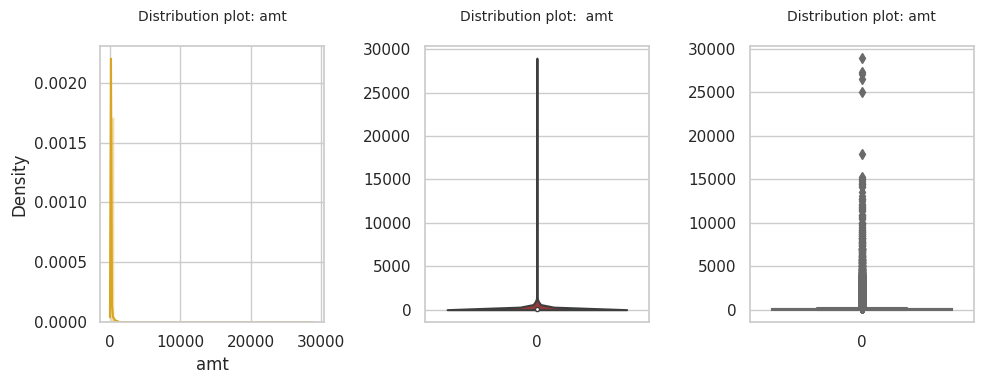

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
col_to_plot= 'amt'
print(f'skewness in {col_to_plot} : ',df[col_to_plot].skew())
sns.distplot(df[col_to_plot], ax=ax[0], hist=True, kde=True, color='goldenrod')
ax[0].set_title(f'Distribution plot: {col_to_plot}\n', fontsize=10)
sns.violinplot(df[col_to_plot], ax=ax[1], hist=True, kde=True, color='brown')
ax[1].set_title(f'Distribution plot:  {col_to_plot}\n', fontsize=10)

sns.boxplot(data=df[col_to_plot], palette="Set3", ax=ax[2])
ax[2].set_title(f'Distribution plot: {col_to_plot}\n', fontsize=10)

plt.tight_layout()

In [30]:
fraud = df[df['is_fraud']==1]
non_fraud =df[df['is_fraud']==0]
print('Fraud case', len(fraud))
print('Non-Fraud case', len(non_fraud))
fraud_percentage =round(len(fraud)*100/len(df),1)
print('Fraud percentage =', fraud_percentage,'%')
non_fraud_percentage =round(len(non_fraud)*100/len(df),1)
print('Non-Fraud percentage =', non_fraud_percentage,'%')

Fraud case 7506
Non-Fraud case 1289169
Fraud percentage = 0.6 %
Non-Fraud percentage = 99.4 %


# Age_Group-wise Fraud

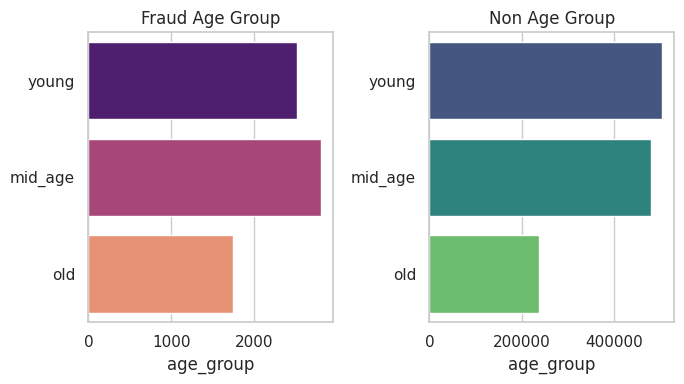

In [31]:
fraud_age_group = fraud['age_group'].value_counts()
non_fraud_age_group = non_fraud['age_group'].value_counts()
plt.figure(figsize =(7,4))

plt.subplot(1,2,1)
sns.barplot(y=fraud_age_group.index, x=fraud_age_group, palette='magma')
plt.title("Fraud Age Group")

plt.subplot(1,2,2)
sns.barplot(y=non_fraud_age_group.index, x=non_fraud_age_group, palette='viridis', )
plt.title("Non Age Group")

plt.tight_layout()
plt.show()

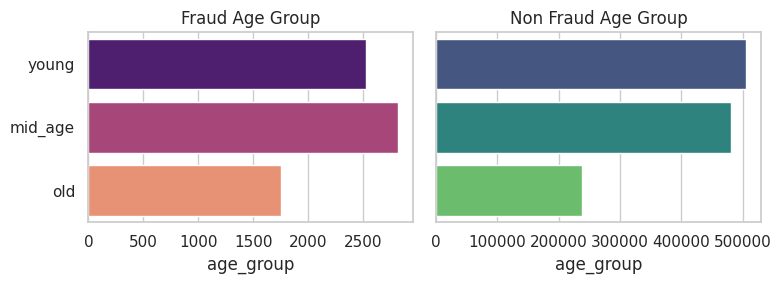

In [32]:
fig,ax =plt.subplots(1,2,figsize =(8,3),sharey =True)

#plt.subplot(1,2,1)
sns.barplot(y=fraud_age_group.index, x=fraud_age_group, palette='magma', ax=ax[0])
ax[0].set_title("Fraud Age Group")

#plt.subplot(1,2,2)
sns.barplot(y=non_fraud_age_group.index, x=non_fraud_age_group, palette='viridis',ax=ax[1] )
ax[1].set_title("Non Fraud Age Group")
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

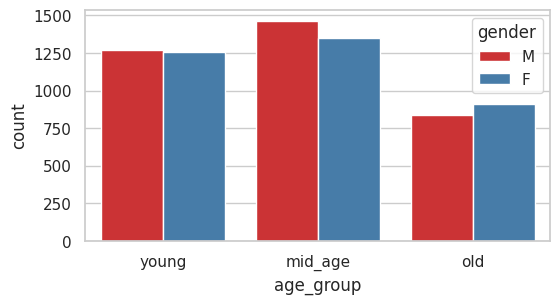

In [33]:
plt.figure(figsize=(6,3))
sns.countplot(x='age_group', palette='Set1', hue='gender', data=fraud)
plt.show()

# ZipCode-wise Fraud

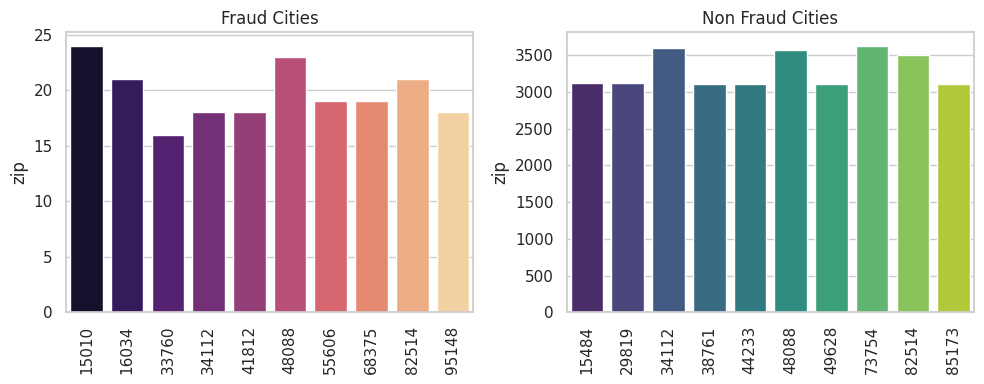

In [34]:
fraud_zip_codes_10 = fraud['zip'].value_counts().head(10)
non_fraud_zip_codes_10 = non_fraud['zip'].value_counts().head(10)
plt.figure(figsize =(10,4))

plt.subplot(1,2,1)
sns.barplot(x=fraud_zip_codes_10.index, y=fraud_zip_codes_10, palette='magma', )
plt.title("Fraud Cities")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=non_fraud_zip_codes_10.index, y=non_fraud_zip_codes_10, palette='viridis', )
plt.title("Non Fraud Cities")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Fraud-wise City

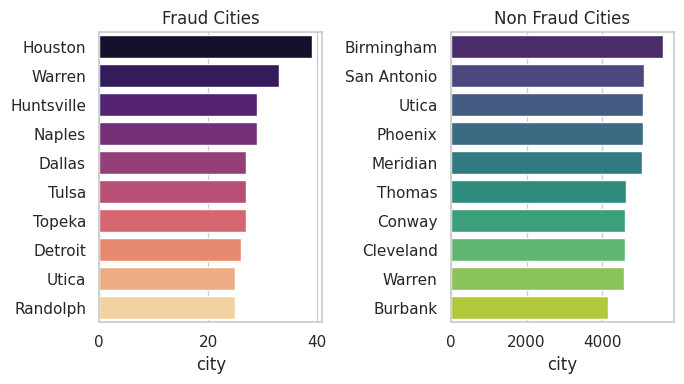

In [35]:
fraud_city_codes_10 = fraud['city'].value_counts().head(10)
non_fraud_city_codes_10 = non_fraud['city'].value_counts().head(10)
plt.figure(figsize =(7,4))

plt.subplot(1,2,1)
sns.barplot(y=fraud_city_codes_10.index, x=fraud_city_codes_10, palette='magma', )
plt.title("Fraud Cities")

plt.subplot(1,2,2)
sns.barplot(y=non_fraud_city_codes_10.index, x=non_fraud_city_codes_10, palette='viridis', )
plt.title("Non Fraud Cities")

plt.tight_layout()
plt.show()

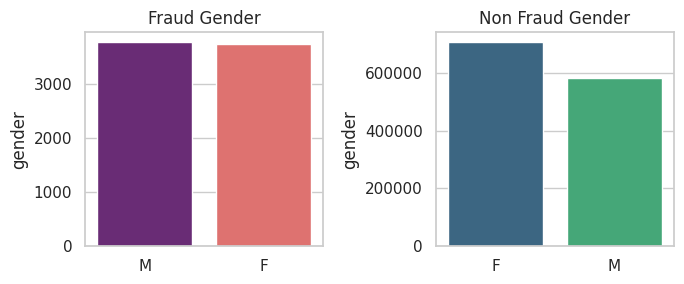

In [36]:
fraud_gender = fraud['gender'].value_counts()
non_fraud_gender = non_fraud['gender'].value_counts()
fig,ax =plt.subplots(1,2,figsize =(7,3))

#plt.subplot(1,2,1)
sns.barplot(x=fraud_gender.index, y=fraud_gender, palette='magma', ax=ax[0])
ax[0].set_title("Fraud Gender")

#plt.subplot(1,2,2)
sns.barplot(x=non_fraud_gender.index, y=non_fraud_gender, palette='viridis',ax=ax[1] )
ax[1].set_title("Non Fraud Gender")

plt.tight_layout()
plt.show()

## Fraud Wise Categories  :

In [37]:
fraud_category = fraud['category'].value_counts()
non_fraud_category = non_fraud['category'].value_counts()

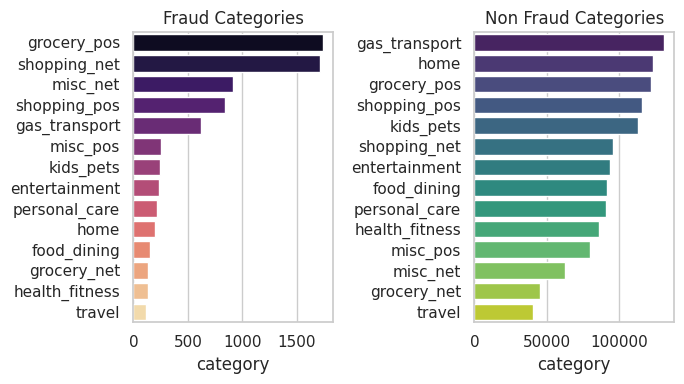

In [38]:
plt.figure(figsize =(7,4))

plt.subplot(1,2,1)
sns.barplot(y=fraud_category.index, x=fraud_category, palette='magma', )
plt.title("Fraud Categories")

plt.subplot(1,2,2)
sns.barplot(y=non_fraud_category.index, x=non_fraud_category, palette='viridis', )
plt.title("Non Fraud Categories")

plt.tight_layout()
plt.show()

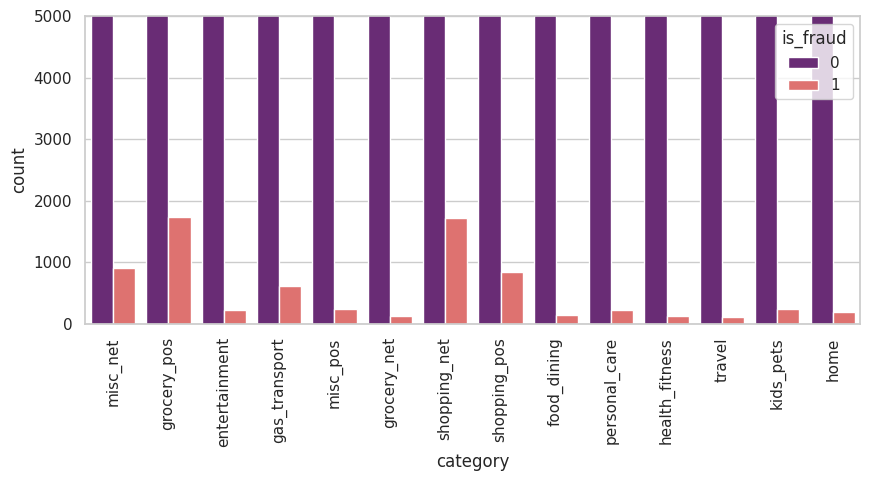

In [39]:
#categories_count  = df['category'].value_counts()[['categories','is_fraud']]
plt.figure(figsize=(10,4))
sns.countplot(x='category', palette='magma', hue='is_fraud', data=df)
plt.ylim([0,5000])
plt.xticks(rotation=90)
plt.show()

In [40]:
cross_tab = pd.crosstab(df['category'], df['is_fraud'])
cross_tab

is_fraud,0,1
category,,
entertainment,93781,233
food_dining,91310,151
gas_transport,131041,618
grocery_net,45318,134
grocery_pos,121895,1743
health_fitness,85746,133
home,122917,198
kids_pets,112796,239
misc_net,62372,915


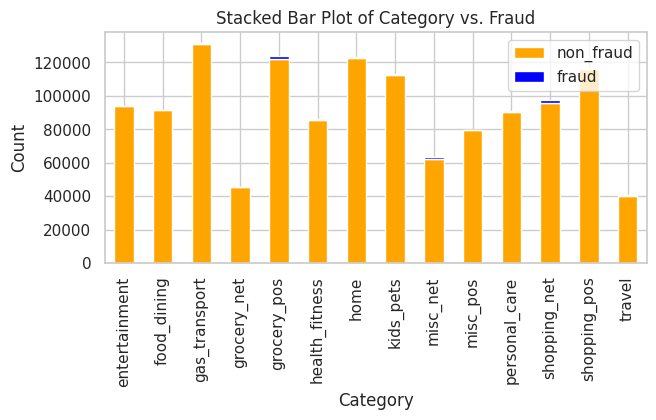

In [41]:
cross_tab.plot(kind='bar', stacked=True, color=['orange', 'blue'], figsize=(7, 3))

plt.title("Stacked Bar Plot of Category vs. Fraud")
plt.legend(['non_fraud','fraud'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Fraud_Percentage

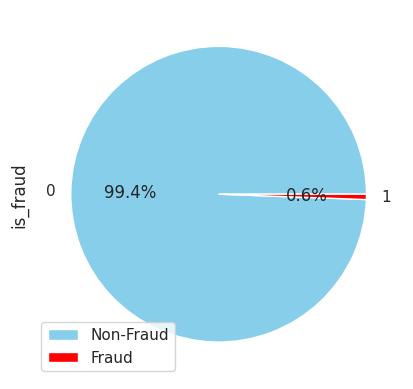

In [42]:
df['is_fraud'].value_counts().plot(kind='pie', colors=['skyblue','red'], autopct="%1.1f%%", legend=['Fraud','non_fraud'])
plt.legend(['Non-Fraud','Fraud'])

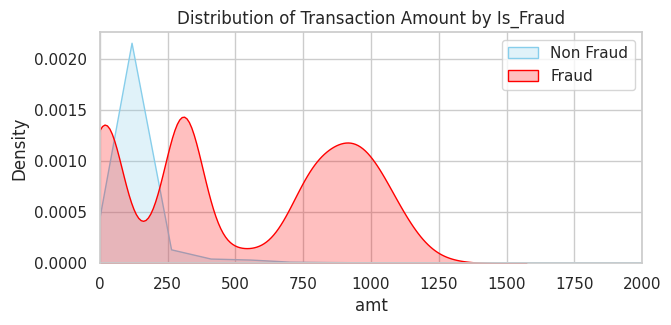

In [43]:
plt.figure(figsize=(7,3))
sns.kdeplot(non_fraud.amt, fill=True, label='Non Fraud',color='skyblue')
sns.kdeplot(fraud.amt, fill=True, label='Fraud',color='red')
#plt.ylabel('Frequency')
#plt.xlabel('Transaction Amount')
plt.xlim(0, 2000)
plt.title('Distribution of Transaction Amount by Is_Fraud')
plt.legend()
plt.show()

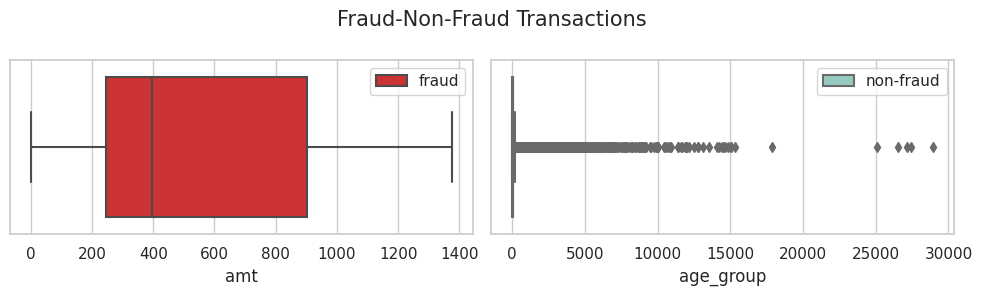

In [44]:
plt.figure(figsize= (10,3))
plt.suptitle('Fraud-Non-Fraud Transactions',fontsize = 15)
plt.subplot(1,2,1)
sns.boxplot(data = fraud, x='amt',palette='Set1'  )
plt.legend( labels=['fraud'],loc='upper right')
plt.subplot(1,2,2)
sns.boxplot(data = non_fraud, x='amt',palette='Set3' )
plt.legend( labels=['non-fraud'],loc='upper right')
plt.xlabel(col)
plt.tight_layout()
plt.show()

In [45]:
df.dtypes

cc_num                 int64
merchant              object
category              object
amt                  float64
gender                object
city                  object
state                 object
zip                    int64
city_pop               int64
job                   object
trans_num             object
unix_time              int64
is_fraud               int64
trans_date    datetime64[ns]
cc_age_yrs             int64
age_group           category
dtype: object

In [46]:
df.nunique()

cc_num            983
merchant          693
category           14
amt             52928
gender              2
city              894
state              51
zip               970
city_pop          879
job               494
trans_num     1296675
unix_time     1274823
is_fraud            2
trans_date        537
cc_age_yrs         83
age_group           3
dtype: int64

In [47]:
final_df = df.drop(['cc_age_yrs','unix_time','trans_num','trans_date'],axis=1)

In [48]:
# plt.figure(figsize=(10, 8))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'merchant', 'category', 'job','state','age_group','city']
for col in categorical_columns:
    final_df[col] = label_encoder.fit_transform(final_df[col])

#df.drop(['','trans_date_trans_time','city', 'state', 'first','last','street','trans_num','dob'], axis=1, inplace = True)

In [50]:
# cols_to_drop =  ['cc_num','merchant','trans_num','zip']
# df.drop( columns = cols_to_drop, inplace= True, axis=1)

In [51]:
final_df.head()

,cc_num,merchant,category,amt,gender,city,state,zip,city_pop,job,is_fraud,age_group
0,2703186189652095,514,8,4.97,0,526,27,28654,3495,370,0,2
1,630423337322,241,4,107.23,0,612,47,99160,149,428,0,2
2,38859492057661,390,0,220.11,1,468,13,83252,4154,307,0,0
3,3534093764340240,360,2,45.00,1,84,26,59632,1939,328,0,0
4,375534208663984,297,9,41.96,1,216,45,24433,99,116,0,2


In [52]:
y = final_df[['is_fraud']]
x = final_df.drop(['is_fraud'], axis=1)

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve , auc

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import  OneClassSVM

In [54]:
sc= StandardScaler()
sc_x =sc.fit_transform(x)

pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.316692,0.851654,0.452853,-0.407826,-0.909206,0.312207,0.022519,-0.749136,-0.282589,0.848099,0.902627
1,-0.318757,-0.506880,-0.569266,0.230039,-0.909206,0.644767,1.418098,1.872567,-0.293670,1.262061,0.902627
2,-0.318728,0.234591,-1.591384,0.934149,1.099861,0.087922,-0.954386,1.281042,-0.280406,0.398450,-1.147400
3,-0.316058,0.085302,-1.080325,-0.158132,1.099861,-1.396996,-0.047260,0.402753,-0.287742,0.548333,-1.147400
4,-0.318471,-0.228206,0.708382,-0.177094,1.099861,-0.886556,1.278540,-0.906090,-0.293835,-0.964771,0.902627
...,...,...,...,...,...,...,...,...,...,...,...
1296670,-0.318735,0.777010,-1.591384,-0.341769,1.099861,-0.445720,1.208761,1.336186,-0.293309,-0.258180,-1.147400
1296671,-0.314165,-1.696220,-1.335854,-0.116339,1.099861,1.422029,-0.465934,-1.004368,-0.293832,0.776726,0.902627
1296672,-0.316072,1.274641,-1.335854,0.221930,1.099861,-0.383849,0.371414,1.469677,-0.291186,0.405587,-1.147400
1296673,-0.316680,0.826773,-1.335854,0.028375,1.099861,0.099523,0.999424,0.332996,-0.290434,1.668887,0.902627


In [55]:
fraud_percent = len(fraud)*100/len(x)
print('Percentage of Fraud :',fraud_percent)

Percentage of Fraud : 0.5788651743883394


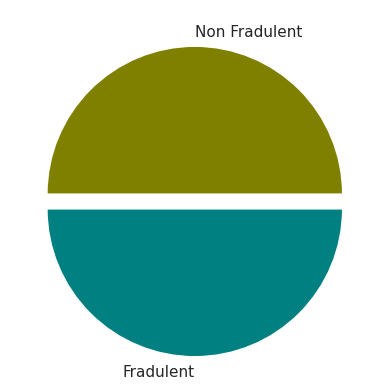

Shape of x and y after oversampling with SMOTE : 
shape of x : (2578338, 11) 
shape of y : (2578338, 1)


In [56]:
smote = SMOTE()
x_smote, y_smote =smote.fit_resample(sc_x,y)
(y_smote.value_counts()*100/len(y)).plot(kind='pie',
                                   labels =['Non Fradulent', 'Fradulent'],
                                   explode= [0,0.1],
                                   colors =['olive','teal',])
plt.ylabel('')
plt.show()
print('Shape of x and y after oversampling with SMOTE : ' )
print('shape of x :', x_smote.shape, '\nshape of y :',y_smote.shape)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.3, random_state= 12, stratify =y_smote )

Model Name : Logistic Regression
▬ Training Accuracy(CrossValidation), 86.0 %

Test Accuracy :0.86%
------------------------------------------------------------
Classification_report:Logistic Regression

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87    386751
           1       0.94      0.76      0.84    386751

    accuracy                           0.86    773502
   macro avg       0.87      0.86      0.86    773502
weighted avg       0.87      0.86      0.86    773502

Test confusion matrix :
 [[366991  19760]
 [ 91045 295706]]

Test ROC-AUC : 0.86


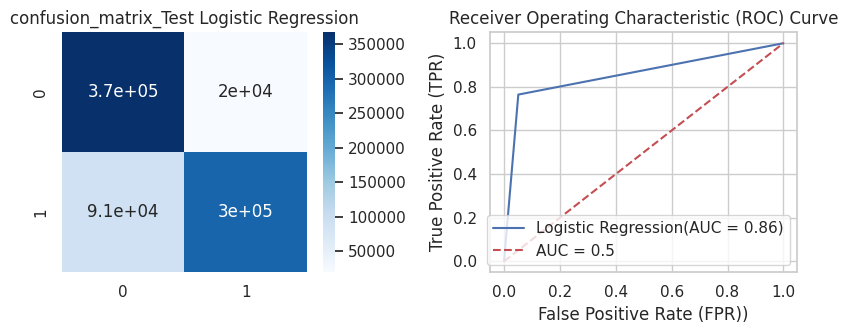

In [58]:
#=================================
model_name = 'Logistic Regression'
print('==='*10)
print('Model Name :', model_name )
print('==='*10)
#=================================
clf1 = LogisticRegression()
clf1.fit(x_train,y_train)
y_pred_train = clf1.predict(x_train)
y_pred_test = clf1.predict(x_test)

#=======================================================
#            Cross Validation
#--------------------------------------------------------
CV_train_acc_logit =(cross_val_score(clf1, x_smote, y_smote, cv =10).mean()).round(2)*100

print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc_logit} %' )
print()
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy :{test_accuracy.round(2)}%' )
#=====================================================
#           Evalutaion Metrics
#-----------------------------------------------------


cm_test = confusion_matrix(y_test, y_pred_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_auc_logit = auc(fpr, tpr)
#---------------------------------------------------------

print( '--'*30)
print( f'Classification_report:{model_name}\n')

print( '--'*30)
print(classification_report(y_test, y_pred_test))
#print( '--'*30)
print(f'Test confusion matrix :\n {cm_test}')
print()
print(f'Test ROC-AUC : {roc_auc_logit.round(2)}')

plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_test, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc_logit:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

plt.plot([0, 1], [0, 1], 'r--', label='AUC = 0.5')

# Set labels and title

plt.xlabel('False Positive Rate (FPR))')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
# Show the plot
plt.show()

Model_name :  Isolation Forest
Accuracy score :  0.7093427420132261
Errors : is_fraud    376888
dtype: int64

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.71      0.83   1289169
           1       0.01      0.75      0.03      7506

    accuracy                           0.71   1296675
   macro avg       0.51      0.73      0.43   1296675
weighted avg       0.99      0.71      0.82   1296675


confusion matrix :
 [[914165 375004]
 [  1884   5622]]

Test ROC-AUC : 0.73


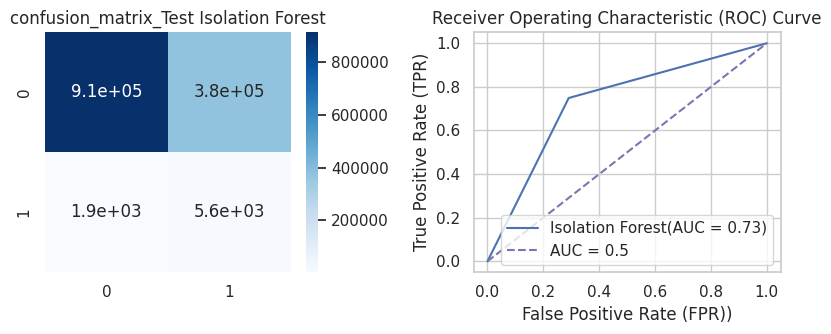

In [60]:
ifc = IsolationForest( contamination='auto' ,random_state=42,)
model_name = 'Isolation Forest'
print('Model_name : ', model_name)
ifc.fit(x)
scores_prediction_ifc = ifc.decision_function(x)

y_pred_ifc = ifc.predict(x)

y_pred =y_pred_ifc.reshape(-1,1)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

accuracy_score_ifc = accuracy_score(y,y_pred)
print('Accuracy score : ', accuracy_score_ifc)

n_errors_ifc = (y_pred != y).sum()
cr_ifc = classification_report(y,y_pred)
cm_ifc = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred_ifc, pos_label=1)
roc_auc = auc(fpr, tpr)


print('Errors :',  n_errors_ifc)
print()
print("Classification Report :\n", cr_ifc)
print()
print("confusion matrix :\n",cm_ifc)
print()
print(f'Test ROC-AUC : {roc_auc:.2f}')
#=================Ploting confucion matrix and ROC charecteristics ============
plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_ifc, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')
#------------------------------------------------------
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')
plt.xlabel('False Positive Rate (FPR))')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
# Show the plot
plt.show()


Model_name :  LocalOutlierFactor
Accuracy score :  0.9747585169761119
Errors : is_fraud    32730
dtype: int64

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289169
           1       0.13      0.60      0.22      7506

    accuracy                           0.97   1296675
   macro avg       0.56      0.79      0.60   1296675
weighted avg       0.99      0.97      0.98   1296675


confusion matrix :
 [[1259415   29754]
 [   2976    4530]]

Test ROC-AUC : 0.79


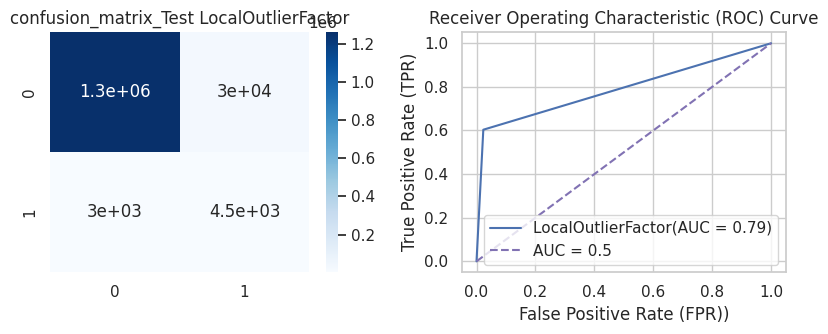

In [62]:
lof = LocalOutlierFactor(contamination='auto')
model_name = 'LocalOutlierFactor'
print('Model_name : ', model_name)
lof.fit(x)
y_pred_lof = lof.fit_predict(x)
scores_prediction_lof = lof.negative_outlier_factor_

y_pred =y_pred_lof.reshape(-1,1)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

accuracy_score_lof = accuracy_score(y,y_pred)
print('Accuracy score : ', accuracy_score_lof)

n_errors_lof = (y_pred != y).sum()
cr_lof = classification_report(y,y_pred)
cm_lof = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred_lof, pos_label=1)
roc_auc_lof = auc(fpr, tpr)


print('Errors :',  n_errors_lof)
print()
print("Classification Report :\n", cr_lof)
print()
print("confusion matrix :\n",cm_lof)
print()
print(f'Test ROC-AUC : {roc_auc_lof:.2f}')
#=================Ploting confucion matrix and ROC charecteristics ============
plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_lof, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')
#------------------------------------------------------
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc_lof:.2f})')
plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')
plt.xlabel('False Positive Rate (FPR))')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
# Show the plot
plt.show()



In [6]:
model_performance = {
    'Model Name': ['Isolation Forest', 'Local Outlier Factor', 'Logistic Regression'],
    'Accuracy Score (%)': [0.70, 0.97, 0.86],
    'Precision (Fraud)': [0.01, 0.13, 0.94],
    'Recall (Fraud)': [0.75, 0.60, 0.76],
    'F1-Score (Fraud)': [0.03, 0.22, 0.84],
    'ROC-AUC': [0.73, 0.79, 0.86],
    'Errors (Fraud)': [376888, 32730, None],  
}

df_model_performance = pd.DataFrame(model_performance)
df_model_performance.set_index('Model Name', inplace=True)
df_model_performance

,Accuracy Score (%),Precision (Fraud),Recall (Fraud),F1-Score (Fraud),ROC-AUC,Errors (Fraud)
Model Name,,,,,,
Isolation Forest,0.70,0.01,0.75,0.03,0.73,376888.0
Local Outlier Factor,0.97,0.13,0.60,0.22,0.79,32730.0
Logistic Regression,0.86,0.94,0.76,0.84,0.86,NaN


<Axes: xlabel='Model Name'>

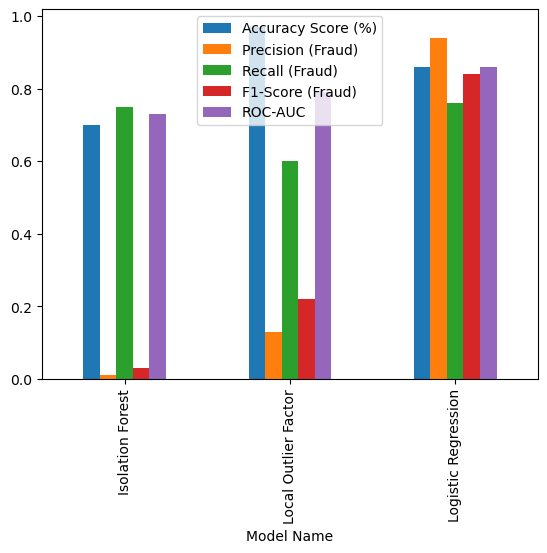

In [7]:
df_model_performance.iloc[:,:-1].plot(kind='bar')

## Summary:
- The Isolation Forest model has a relatively lower accuracy but a decent recall for fraud cases.
- Logistic Regression performs well with high accuracy, precision, and recall for fraud cases.
- The Local Outlier Factor model has a high accuracy but lower precision and recall for fraud cases.


The model Isolation Forest having lowest **FN (=1884)** infers it will encounter less missed cases of fraudulent. Out of **7506 Fraud cases**, It has predicted **5622** cases **correctly** and **1884** cases **incorrectly**.